In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/titanic.csv')
print(data.info())  # Data types and missing values
print(data.describe())  # Summary statistics
print(data.head())


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std

In [ ]:
! ls drive/MyDrive

'as i lay dying #1.gdoc'	   'PHY 211 001 Project.docx - Line chart 1.gsheet'
'Boettcher Essay.gdoc'		   'public deliberation.gdoc'
'bronco letter.gdoc'		   'reading  writing response.gdoc'
'civic engagement speech.gdoc'	   'rmhc essays.gdoc'
'Colab Notebooks'		   'Short responses: Boettcher.gdoc'
'community service.gdoc'	   'speech of tribute.gdoc'
'Copy of titanic.csv'		   'tax analysisalysis.gdoc'
'eating healthy revision.gdoc'	   'things to do....gdoc'
 editorial.gdoc			    titanic.csv
'Elks Scholarship Essay.gdoc'	   'unit 5 essay.gdoc'
'Finanacial Lit Final.gdoc'	   'Untitled document (1).gdoc'
'food desert.gdoc'		   'Untitled document (2).gdoc'
'guest speaker.gdoc'		   'Untitled document (3).gdoc'
 infograph.gdoc			   'Untitled document (4).gdoc'
'informative speech.gdoc'	   'Untitled document (5).gdoc'
'literacy narrative draft 2.gdoc'  'Untitled document (6).gdoc'
'litracy narrative.gdoc'	   'Untitled document (7).gdoc'
'news article.gdoc'		   'Untitled document.gdoc'
'news rep

In [2]:
#Data Cleaning

#data.dtypes
#data.shape
data.isnull().sum()
data.drop('Cabin', axis=1, inplace=False) #Drop Cabin Column

median_age = data['Age'].median()
median_age_no_missing = data['Age'].fillna(0).median() #Replace missing ages with median

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0]) #Replacing missing values with the most popular

data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)

# Check for missing values in the 'Fare' column
data['Fare'].isnull().sum()





<ipython-input-2-9cd4fe793954>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].fillna(data['Sex'].mode()[0], inplace=True)


0

In [3]:
# Compute mean
mean_age = data['Age'].mean()

# Compute median
median_age = data['Age'].median()

# Compute mode
mode_age = data['Age'].mode()

# Compute standard deviation
std_age = data['Age'].std()

# Print results
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode Age: {mode_age[0]}")  # mode() returns a Series, so we get the first value
print(f"Standard Deviation of Age: {std_age}")

# Compute mean
mean_fare = data['Fare'].mean()

# Compute median
median_fare = data['Fare'].median()

# Compute mode
mode_fare = data['Fare'].mode()

# Compute standard deviation
std_fare = data['Fare'].std()

# Print results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Mode Fare: {mode_fare[0]}")  # mode() returns a Series, so we get the first value
print(f"Standard Deviation of Fare: {std_fare}")



# Compute mean
mean_SibSp = data['SibSp'].mean()

# Compute median
median_SibSp = data['SibSp'].median()

# Compute mode
mode_SibSp = data['SibSp'].mode()

# Compute standard deviation
std_SibSp = data['SibSp'].std()

# Print results
print(f"Mean SibSp: {mean_SibSp}")
print(f"Median SibSp: {median_SibSp}")
print(f"Mode SibSp: {mode_SibSp[0]}")  # mode() returns a Series, so we get the first value
print(f"Standard Deviation of SibSp: {std_SibSp}")

Mean Age: 29.69911764705882
Median Age: 28.0
Mode Age: 24.0
Standard Deviation of Age: 14.526497332334044
Mean Fare: 32.204207968574636
Median Fare: 14.4542
Mode Fare: 8.05
Standard Deviation of Fare: 49.693428597180905
Mean SibSp: 0.5230078563411896
Median SibSp: 0.0
Mode SibSp: 0
Standard Deviation of SibSp: 1.1027434322934275


In [6]:
# Group by Pclass and calculate the mean survival rate (as a percentage)
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean() * 100

print(survival_rate_by_class)

# Group by both Sex and Pclass and calculate the mean survival rate
survival_rate_by_sex_class = data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print(survival_rate_by_sex_class)

# Group by Age and calculate the mean survival rate
survival_rate_by_age = data.groupby('Age')['Survived'].mean() * 100

print(survival_rate_by_age)

# Group by both Sex and Age and calculate the mean survival rate
survival_rate_by_sex_age = data.groupby(['Sex', 'Age'])['Survived'].mean() * 100

print(survival_rate_by_sex_age)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64
Age
0.42     100.0
0.67     100.0
0.75     100.0
0.83     100.0
0.92     100.0
         ...  
70.00      0.0
70.50      0.0
71.00      0.0
74.00      0.0
80.00    100.0
Name: Survived, Length: 88, dtype: float64
Sex     Age  
female  0.75     100.000000
        1.00     100.000000
        2.00      33.333333
        3.00      50.000000
        4.00     100.000000
                    ...    
male    70.00      0.000000
        70.50      0.000000
        71.00      0.000000
        74.00      0.000000
        80.00    100.000000
Name: Survived, Length: 145, dtype: float64


Survived
0    549
1    342
Name: count, dtype: int64


<ipython-input-7-d3a15d4ce290>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data= data, palette='Set2')


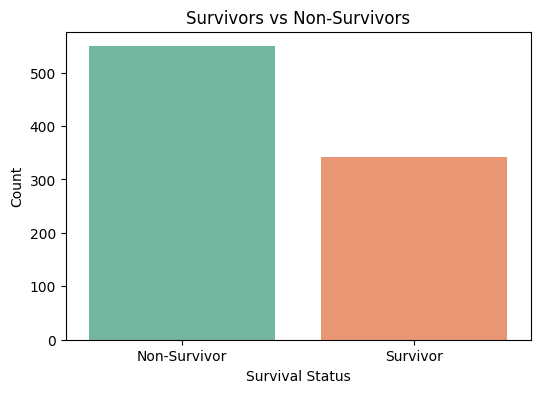

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of survivors (1) and non-survivors (0)
survival_counts = data['Survived'].value_counts()

# Display the counts
print(survival_counts)


plt.figure(figsize=(6, 4))


sns.countplot(x='Survived', data= data, palette='Set2')


plt.title('Survivors vs Non-Survivors')
plt.xlabel('Survival Status')
plt.ylabel('Count')


plt.xticks([0, 1], ['Non-Survivor', 'Survivor'])

plt.show()





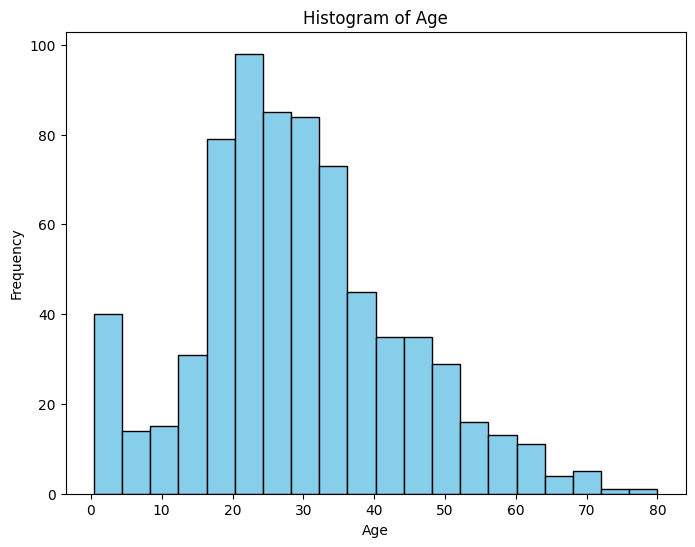

In [8]:
import matplotlib.pyplot as plt

# Histogram for the Age column
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.show()

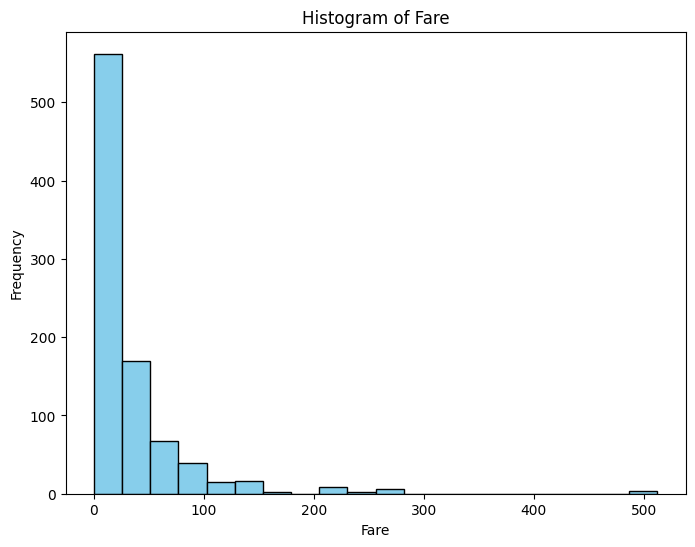

In [9]:
# Histogram for the Fare column
plt.figure(figsize=(8, 6))
plt.hist(data['Fare'], bins=20, color='skyblue', edgecolor='black')


plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')


plt.show()

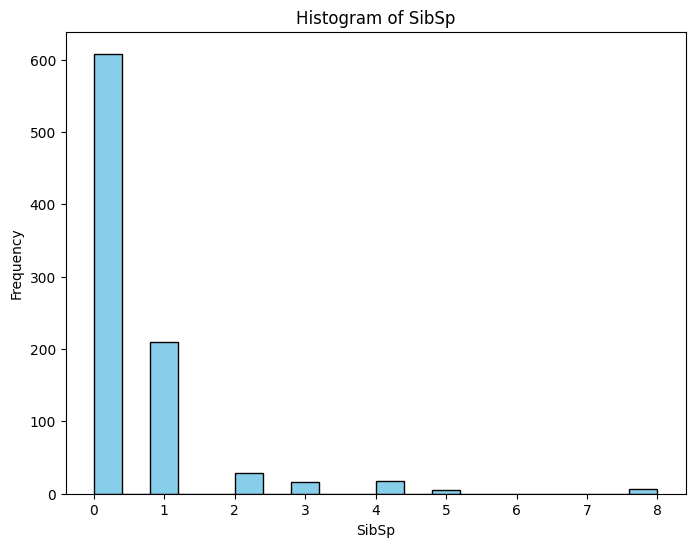

In [10]:
# Histogram for the SibSp column
plt.figure(figsize=(8, 6))
plt.hist(data['SibSp'], bins=20, color='skyblue', edgecolor='black')

plt.title('Histogram of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Frequency')


plt.show()

<ipython-input-11-6eb7e672fe5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='Set2')


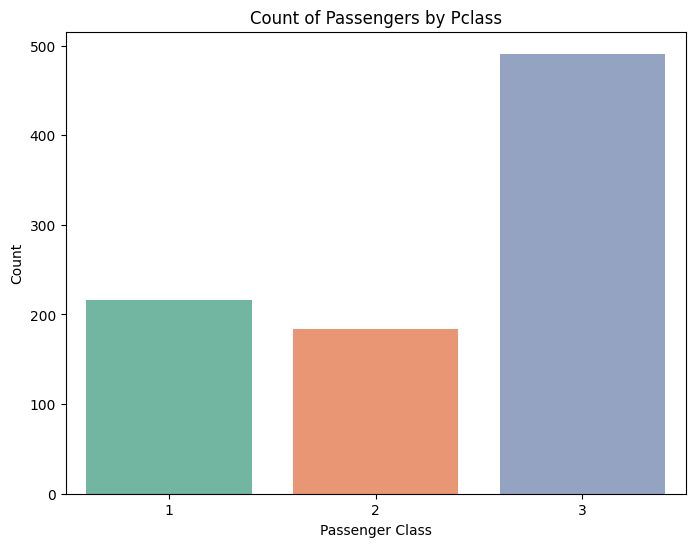

In [11]:
# Create a bar plot for the Pclass column
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='Set2')

plt.title('Count of Passengers by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.show()

<ipython-input-12-c5267416249d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='Set2')


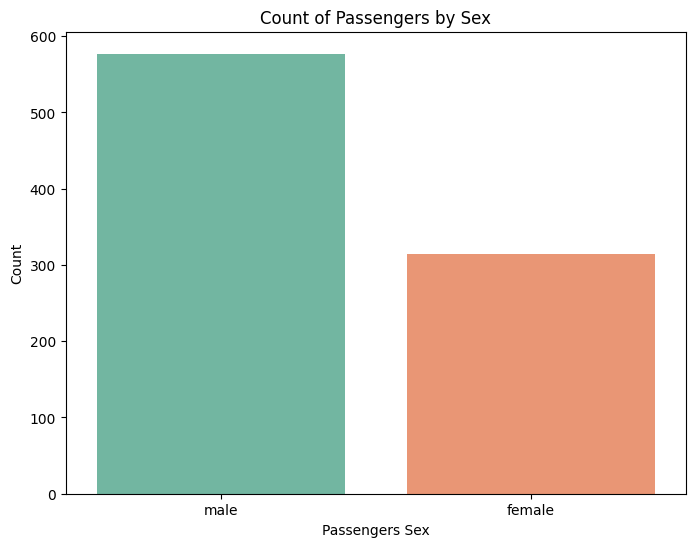

In [12]:
# Create a bar plot for the Sex column
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, palette='Set2')

plt.title('Count of Passengers by Sex')
plt.xlabel('Passengers Sex')
plt.ylabel('Count')

plt.show()

<ipython-input-13-f9e290d85e2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=data, palette='Set2')


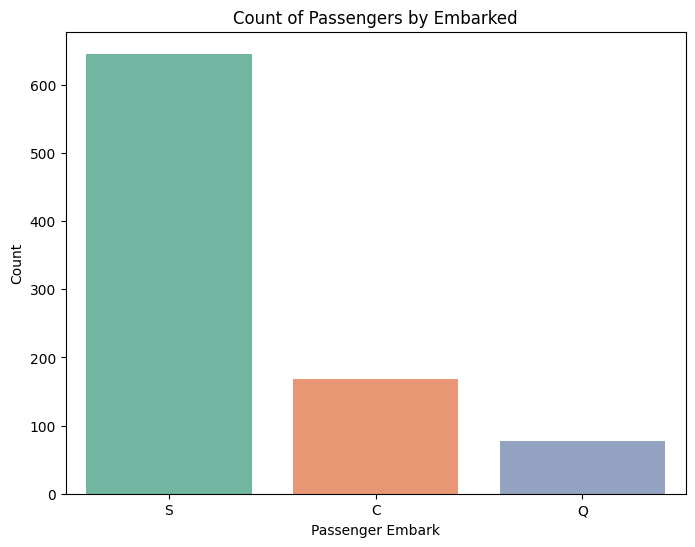

In [13]:
# Create a bar plot for the Embarked column
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=data, palette='Set2')

plt.title('Count of Passengers by Embarked')
plt.xlabel('Passenger Embark')
plt.ylabel('Count')

plt.show()

<ipython-input-14-078e35823123>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Age', data=data, palette='Set3')


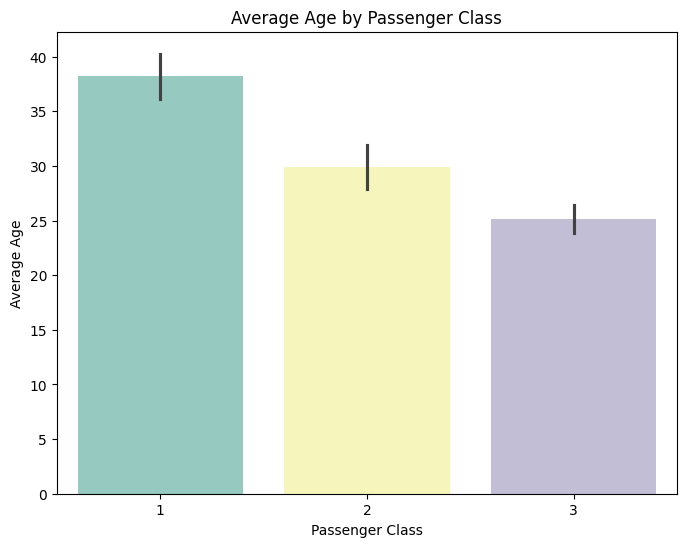

In [14]:
# Create a bar plot for the mean 'Age' grouped by 'Pclass'
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Age', data=data, palette='Set3')


plt.title('Average Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Age')


plt.show()

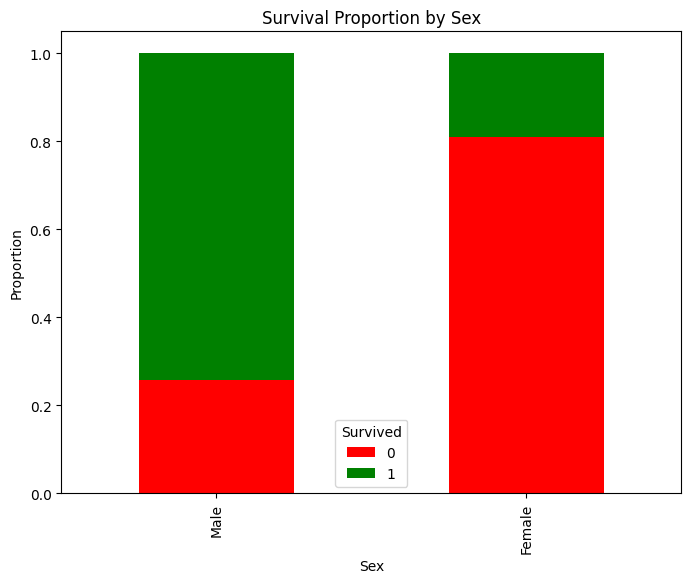

In [15]:
# Calculate the survival proportions for each sex
survival_proportion = data.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

# Plot the proportions
survival_proportion.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))


plt.title('Survival Proportion by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Male', 'Female'])


plt.show()

<ipython-input-16-824e060e634c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_class, x='Pclass', y='Survived', palette='Blues_d')


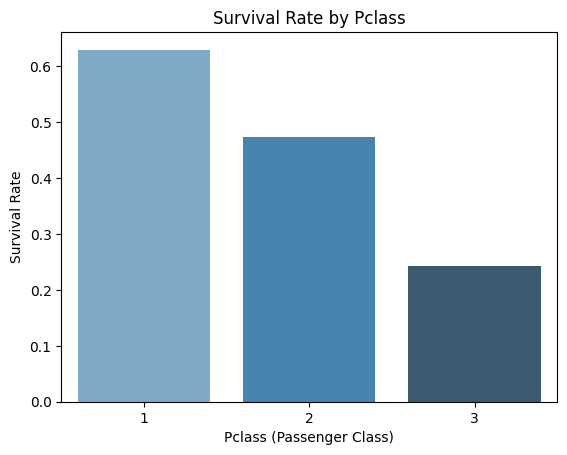

In [16]:
survival_by_class = data.groupby('Pclass')['Survived'].mean().reset_index()

# Bar chart for survival vs Pclass
sns.barplot(data=survival_by_class, x='Pclass', y='Survived', palette='Blues_d')


plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Survival Rate')


plt.show()



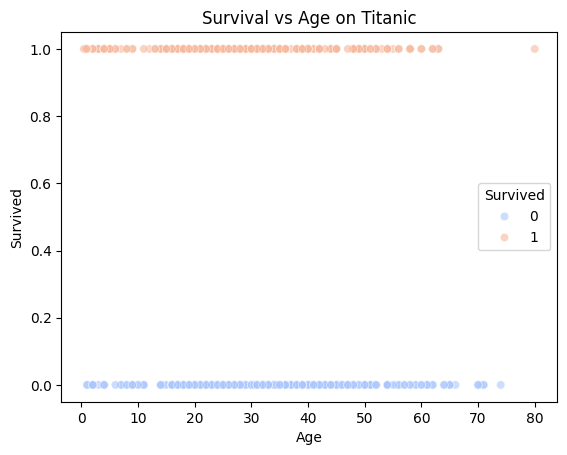

In [17]:
# Scatter plot for Age
sns.scatterplot(data=data, x='Age', y='Survived', hue='Survived', palette='coolwarm', alpha=0.6)

plt.title('Survival vs Age on Titanic')
plt.xlabel('Age')
plt.ylabel('Survived')


plt.show()

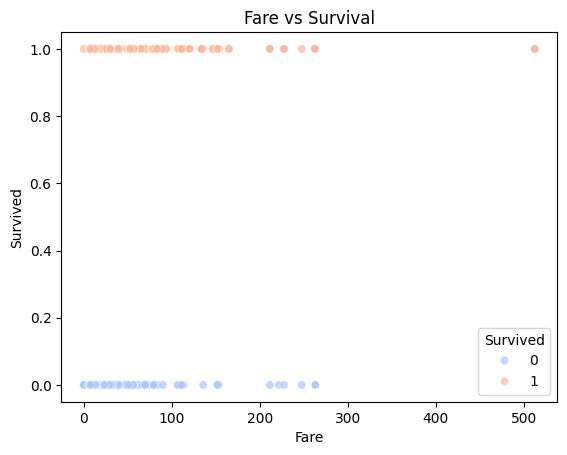

In [18]:
# Scatter Plot for Fare vs Survival
sns.scatterplot(data=data, x='Fare', y='Survived', hue='Survived', palette='coolwarm', alpha=0.7)


plt.title('Fare vs Survival')
plt.xlabel('Fare')
plt.ylabel('Survived')


plt.show()

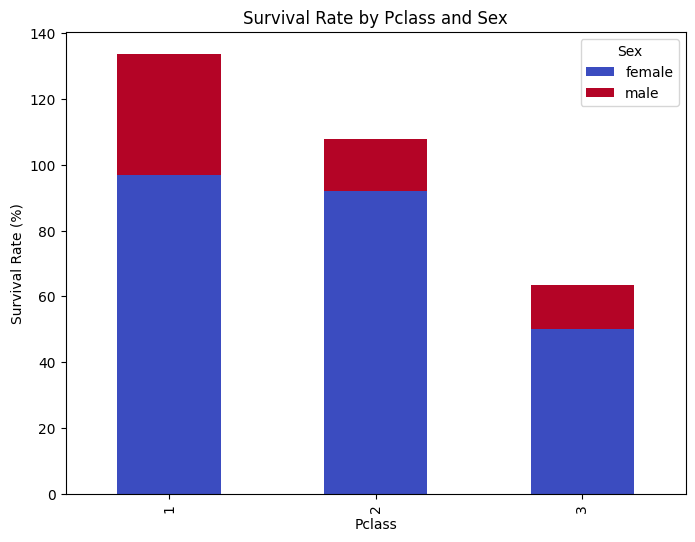

In [19]:

# Group by 'Pclass' and 'Sex' and calculate the mean survival rate
survival_rate_by_sex_class = data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack() * 100

# Stacked bar plot
survival_rate_by_sex_class.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.legend(title='Sex')
plt.show()

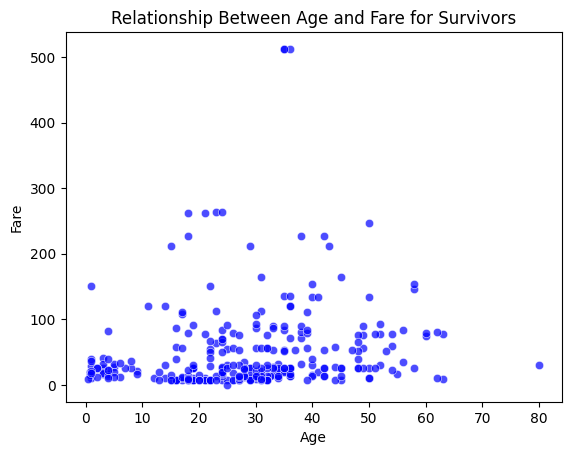

In [20]:
survivors = data[data['Survived'] == 1]

# Scatter plot for Age vs Fare for survivors
sns.scatterplot(data=survivors, x='Age', y='Fare', color='blue', alpha=0.7)


plt.title('Relationship Between Age and Fare for Survivors')
plt.xlabel('Age')
plt.ylabel('Fare')


plt.show()


<ipython-input-21-cc4e045d9ec9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survivors, x='Pclass', y='Age', palette='Set2')


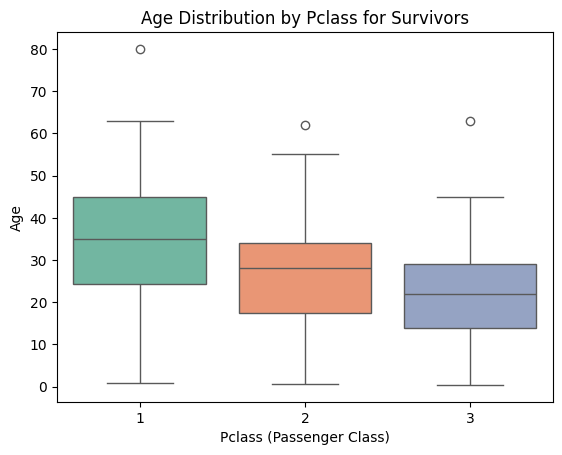

In [21]:
survivors = data[data['Survived'] == 1]

# Box plot for Age vs Pclass for survivors
sns.boxplot(data=survivors, x='Pclass', y='Age', palette='Set2')


plt.title('Age Distribution by Pclass for Survivors')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Age')


plt.show()

<ipython-input-22-8615d6300a4f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=survivors, x='Sex', y='Age', palette='Set2')


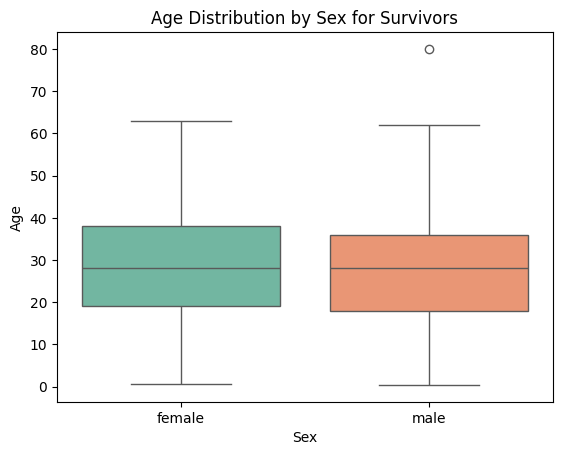

In [22]:
survivors = data[data['Survived'] == 1]

# Box plot for Age vs Sex for survivors
sns.boxplot(data=survivors, x='Sex', y='Age', palette='Set2')

plt.title('Age Distribution by Sex for Survivors')
plt.xlabel('Sex')
plt.ylabel('Age')


plt.show()

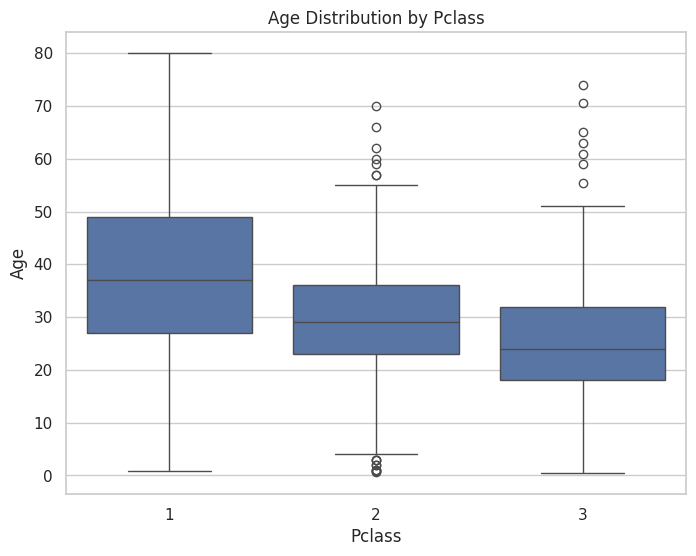

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Boxplot of Age by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=data)


plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.show()

In [23]:
# Calculate overall survival rate
overall_survival_rate = data['Survived'].mean() * 100

# Calculate survival rate by Pclass
survival_rate_by_class = data.groupby('Pclass')['Survived'].mean() * 100

# Calculate the difference in survival rate compared to overall
survival_diff = survival_rate_by_class - overall_survival_rate

print(f"Overall Survival Rate: {overall_survival_rate}%")
print(f"Survival Rate by Class: \n{survival_rate_by_class}")
print(f"Difference in Survival Rate: \n{survival_diff}")

Overall Survival Rate: 38.38383838383838%
Survival Rate by Class: 
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64
Difference in Survival Rate: 
Pclass
1    24.579125
2     8.898770
3   -14.147586
Name: Survived, dtype: float64


In [24]:
#Looking for correlations between numerical features

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)

# Calculate the correlation matrix for the numerical features
correlation_matrix = data[numerical_features].corr()

# Correlation matrix
print(correlation_matrix)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


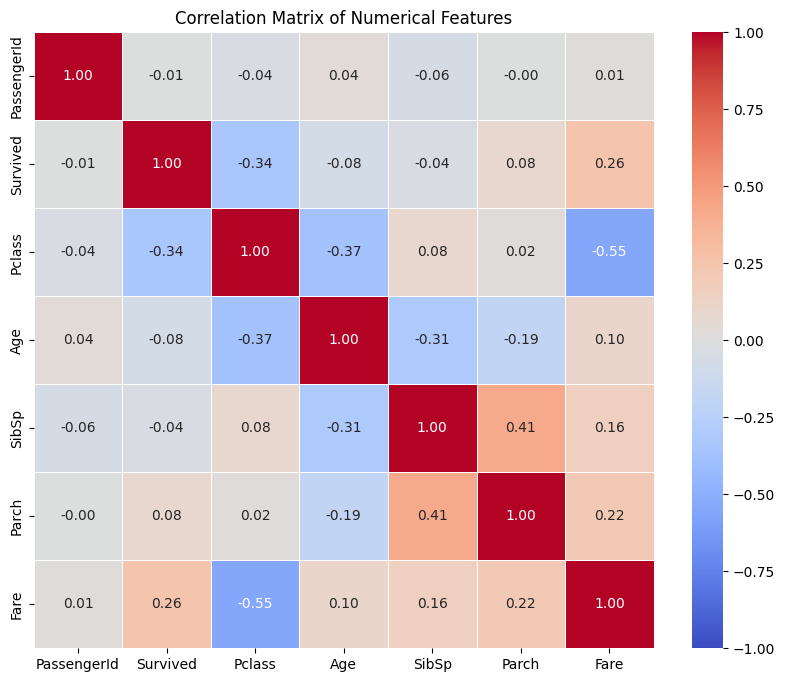

In [25]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')


plt.title('Correlation Matrix of Numerical Features')


plt.show()

In [26]:
import scipy.stats as stats

# Create a contingency table for 'Survived' and 'Pclass'
contingency_table = pd.crosstab(data['Survived'], data['Pclass'])
print(contingency_table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [27]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2 Stat: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies: 
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [28]:
contingency_sex = pd.crosstab(data['Survived'], data['Sex'])
chi2_stat_sex, p_value_sex, dof_sex, expected_sex = stats.chi2_contingency(contingency_sex)

print(f"Chi2 Stat: {chi2_stat_sex}")
print(f"P-value: {p_value_sex}")
print(f"Degrees of Freedom: {dof_sex}")
print(f"Expected Frequencies: \n{expected_sex}")

Chi2 Stat: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies: 
[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


Chi- Square wasn't as helpful as I was expecting.

In [45]:
#One-hot encoding

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Excluding Name, Ticket and Cabin
categorical_cols = [col for col in categorical_cols if col not in ['Name', 'Ticket', 'Cabin']]


data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


print(data_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                              Heikkinen, Miss Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  ...  Title_Miss Telma Matilda  \
0         A/5 21171   7.2500   NaN  ...                     False   
1          PC 17599  71.2833   C85  ...                     False   
2  STON/O2. 3101282   7.9250   NaN  ...                     False   
3            113803  53.1000  C123  ...           

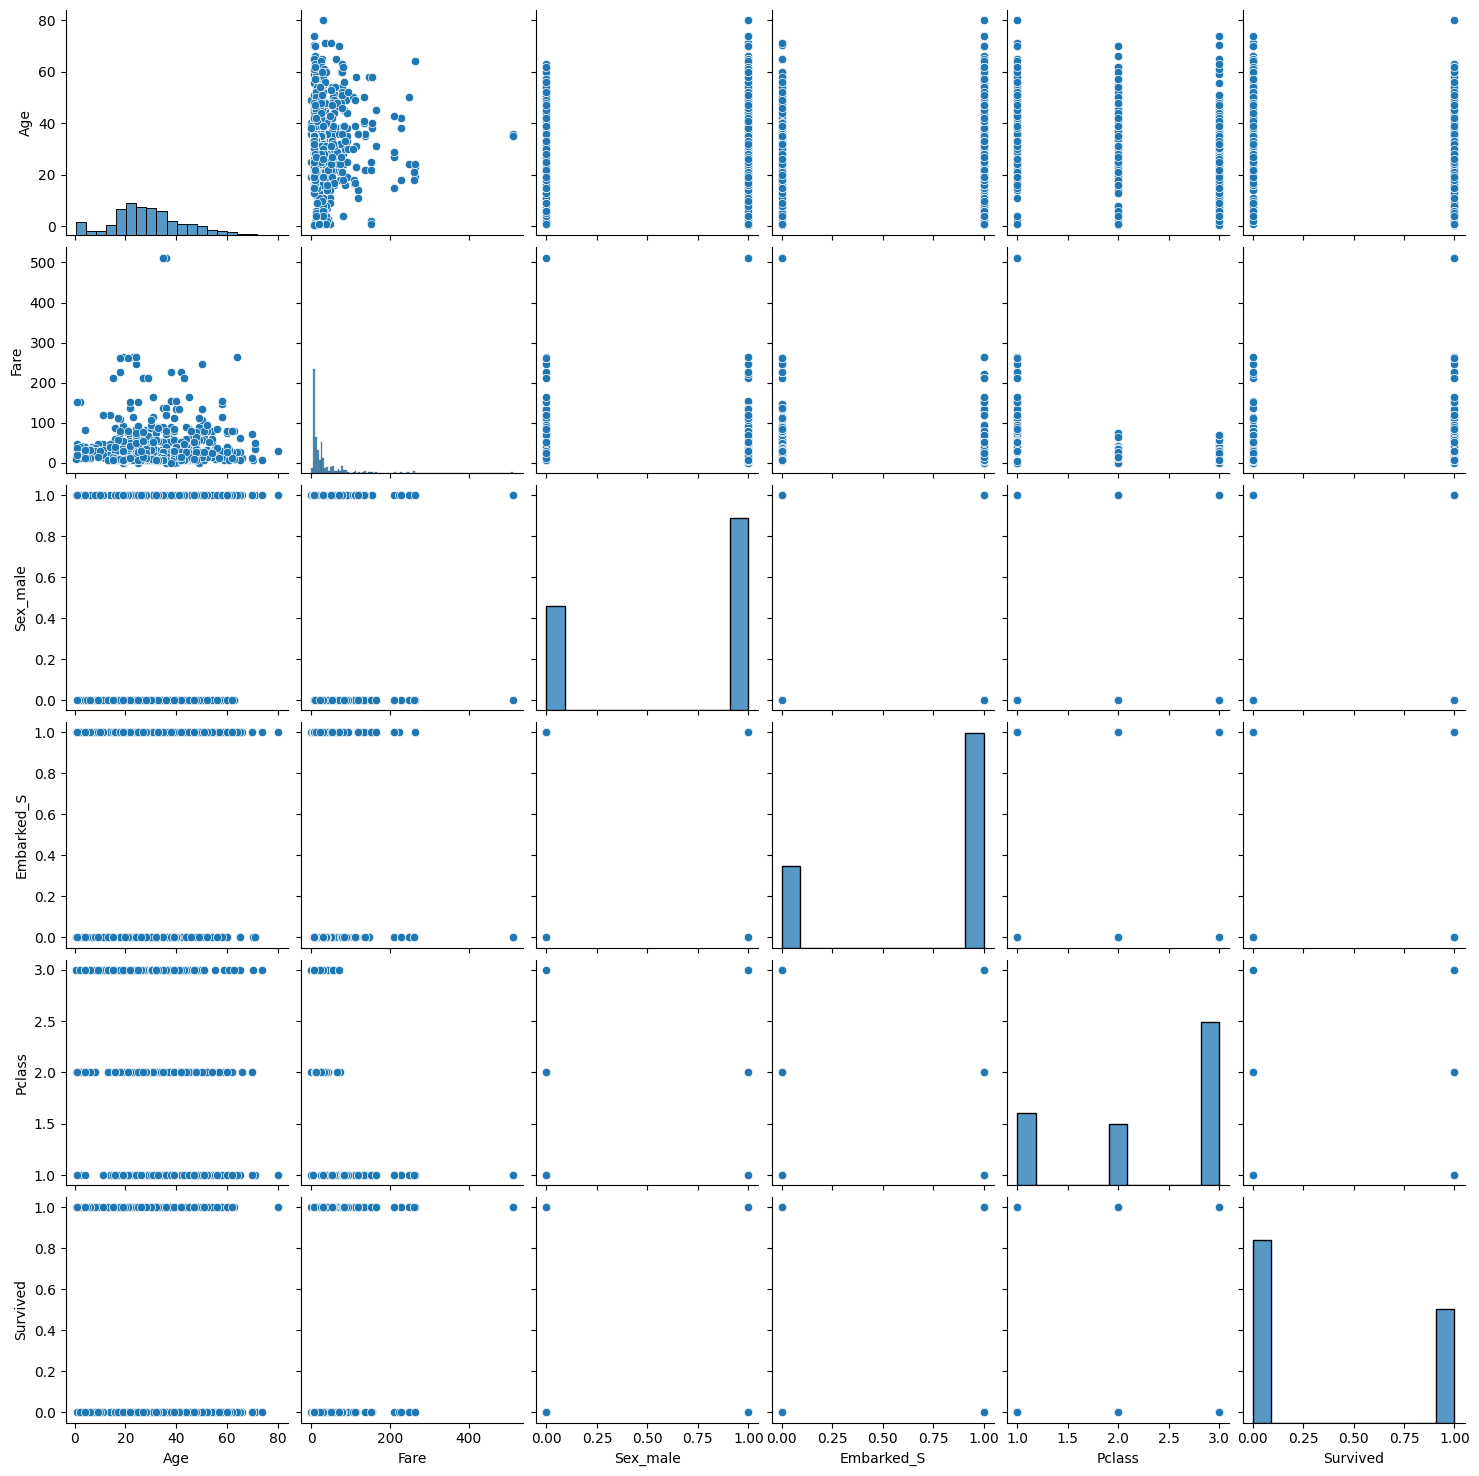

In [51]:
# Pairplot for a subset of features
sns.pairplot(data_encoded[['Age', 'Fare', 'Sex_male', 'Embarked_S', 'Pclass', 'Survived']])
plt.show()